## Importação das bibliotecas

In [5]:
import pandas as pd
import numpy as np
import locale
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

## Visualização inicial do DataFrame

In [6]:
# Caminho do arquivo Excel
excel_file = "dados\Export_Vendas_Sintetico.xlsx"

# Leitura do arquivo Excel e seleção das colunas desejadas
df = pd.read_excel(excel_file, sheet_name='Planilha1', usecols=['Data', 'Valor', 'Status', 'Operador', 'Vendedor'])

# Exibição o número de linhas e colunas do DataFrame
print("Número de Linhas e Colunas")
print(df.shape)
print("------------")

# Exibir as primeiras linhas do DataFrame
print("Primeiras Linhas do DataFrame")
print(df.head())
print("------------")

# Exibir os tipos de dados ajustados
print("Tipos de Dados")
print(df.dtypes)

Número de Linhas e Colunas
(103207, 5)
------------
Primeiras Linhas do DataFrame
                  Data    Valor     Status Operador Vendedor
0  21/12/2018 08:28:57   10.350  CANCELADA   Amanda     Neto
1  21/12/2018 09:16:04   10.350  CANCELADA     João   Victor
2  21/12/2018 09:16:02   10.350  CANCELADA     Taís    Lucas
3  21/12/2018 09:19:16    9.315  CANCELADA  Marcelo  Regiane
4  21/12/2018 09:23:14  224.850    REGULAR   Thales   Rebeca
------------
Tipos de Dados
Data         object
Valor       float64
Status       object
Operador     object
Vendedor     object
dtype: object


## Ajuste dos dados

In [7]:
# Renomear as colunas
df.rename(columns={
    'Data': 'data',
    'Valor': 'valor',
    'Status': 'status',
    'Operador': 'operador',
    'Vendedor': 'vendedor'
}, inplace=True)

# Ajustar as variáveis da coluna status
df['status'] = df['status'].str.capitalize()

# Definir o locale para Português do Brasil (pt_BR)
locale.setlocale(locale.LC_NUMERIC, 'pt_BR.UTF-8')

# Função para converter valores
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace('.', '').replace(',', '.')
    return float(value)

# Aplicar a função de conversão na coluna 'valor' para float aplicando
df['valor'] = df['valor'].apply(convert_to_float)

# Converter a coluna 'data' para Timestamp
try:
    df['data'] = pd.to_datetime(df['data'])
except ValueError as e:
    print(f"Não foi possível converter a coluna 'data' para Timestamp: {e}")

# Truncar a coluna 'status' para 10 caracteres
df['status'] = df['status'].apply(lambda x: x[:10])

# Remover linhas onde o status é 'Cancelada' ou 'Inutilizada'
df = df[~df['status'].isin(['Cancelada', 'Inutilizad'])]

# Exibir as primeiras linhas do DataFrame após a conversão
print("Primeiras Linhas do DataFrame - compras devidamente efetivadas")
print(df.head())
print("------------")

# Exibir os tipos de dados ajustados
print("Tipos de Dados")
print(df.dtypes)

Primeiras Linhas do DataFrame - compras devidamente efetivadas
                 data   valor   status operador vendedor
4 2018-12-21 09:23:14  224.85  Regular   Thales   Rebeca
5 2018-12-21 09:32:23  359.70  Regular   Amanda   Sérgio
6 2018-12-21 09:36:16  329.85  Regular     João     Neto
7 2018-12-21 09:39:16   89.85  Regular     Taís   Victor
8 2018-12-21 09:41:22  269.73  Regular  Marcelo    Lucas
------------
Tipos de Dados
data        datetime64[ns]
valor              float64
status              object
operador            object
vendedor            object
dtype: object


## Checagem dos Dados

In [8]:
# visualizar o DataFrame

# Ajustar as opções de exibição do pandas
pd.options.display.float_format = '{:.2f}'.format

# Exibir o DataFrame completo
df

,data,valor,status,operador,vendedor
4,2018-12-21 09:23:14,224.85,Regular,Thales,Rebeca
5,2018-12-21 09:32:23,359.70,Regular,Amanda,Sérgio
6,2018-12-21 09:36:16,329.85,Regular,João,Neto
7,2018-12-21 09:39:16,89.85,Regular,Taís,Victor
8,2018-12-21 09:41:22,269.73,Regular,Marcelo,Lucas
...,...,...,...,...,...
103202,2023-04-01 16:55:52,294.60,Regular,Thales,Victor
103203,2023-04-01 16:58:35,359.97,Regular,Amanda,Neto
103204,2023-04-01 17:00:39,539.96,Regular,João,Victor
103205,2023-04-01 17:01:40,179.98,Regular,Taís,Lucas


In [9]:
# Exibição o número de linhas e colunas do DataFrame
print("Número de Linhas e Colunas")
print(f"Número de Linhas e Colunas: {df.shape[0]} linhas, {df.shape[1]} colunas")

# Exibição os nomes das colunas do DataFrame
print("\nNomes das Colunas")
print(df.columns.to_list())

# Exibição informações gerais sobre o DataFrame
print("\nInformações Gerais")
df.info()

# Exibição do número de valores vazios (nulos) em cada coluna
print("\nChecagem de Valores Vazios")
print(df.isnull().sum())

# Exibição do número de linhas duplicadas no DataFrame
print("\nNúmero de Linhas Duplicadas")
print(df.duplicated().sum())

Número de Linhas e Colunas
Número de Linhas e Colunas: 102438 linhas, 5 colunas

Nomes das Colunas
['data', 'valor', 'status', 'operador', 'vendedor']

Informações Gerais
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102438 entries, 4 to 103206
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   data      102438 non-null  datetime64[ns]
 1   valor     102438 non-null  float64       
 2   status    102438 non-null  object        
 3   operador  102438 non-null  object        
 4   vendedor  102438 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 4.7+ MB

Checagem de Valores Vazios
data        0
valor       0
status      0
operador    0
vendedor    0
dtype: int64

Número de Linhas Duplicadas
0


In [29]:
# Exibe o número de valores únicos em cada coluna do DataFrame
print(df.nunique())

print("------------")

# Extrai os valores únicos da coluna 'operador' e armazena em uma variável
operadores = df["operador"].unique()

# Imprime a lista de operadores únicos, formatada como uma string
print(f"Os operadores são: {', '.join(map(str, operadores))}")

print("------------")

# Extrai os valores únicos da coluna 'vendedor' e armazena em uma variável
vendedores = df["vendedor"].unique()

# Imprime a lista de vendedores únicos, formatada como uma string
print(f"Os vendedores são: {', '.join(map(str, vendedores))}")

print("------------")

# Extrai os valores únicos da coluna 'status' para conferir se o df apresenta apenas as compras regulares
status_regular = df["status"].unique()

# Imprime a lista de operadores únicos, formatada como uma string
print(f"O status é apenas: {', '.join(map(str, status_regular))}")

data        102291
valor        11774
status           1
operador         5
vendedor         6
dtype: int64
------------
Os operadores são: Thales, Amanda, João, Taís, Marcelo
------------
Os vendedores são: Rebeca, Sérgio, Neto, Victor, Lucas, Regiane
------------
O status é apenas: Regular


## Análise Exploratória

### Dados Estatísticos

In [31]:
# Exibição dos dados estatísticos das colunas numéricas com duas casas decimais
with pd.option_context("float_format", "{:.2f}".format):
    display(df.describe())

,valor
count,102438.00
mean,276.73
std,387.33
min,0.00
25%,148.50
50%,224.85
75%,344.12
max,58534.23


### Box Plot da coluna de valor da compra

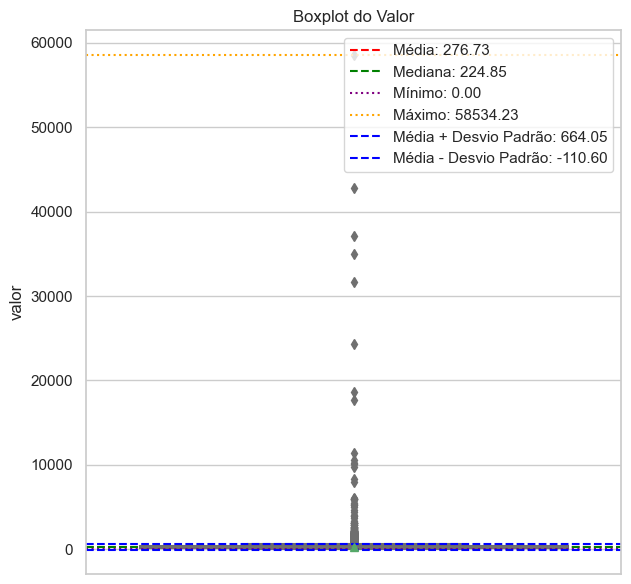

In [12]:
# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar a figura e os subplots
plt.figure(figsize=(12, 6))

# Subplot para 'valor'
plt.subplot(1, 2, 1)

# Criar o boxplot
sns.boxplot(y=df['valor'], color='skyblue', showmeans=True)

# Adicionar o título
plt.title('Boxplot do Valor')

# Calcular medidas resumo
mean = df['valor'].mean()
median = df['valor'].median()
min_value = df['valor'].min()
max_value = df['valor'].max()
std_dev = df['valor'].std()

# Adicionar linhas horizontais para média, mediana, mínimo, máximo e desvio padrão
plt.axhline(mean, color='red', linestyle='--', label=f'Média: {mean:.2f}')
plt.axhline(median, color='green', linestyle='--', label=f'Mediana: {median:.2f}')
plt.axhline(min_value, color='purple', linestyle=':', label=f'Mínimo: {min_value:.2f}')
plt.axhline(max_value, color='orange', linestyle=':', label=f'Máximo: {max_value:.2f}')
plt.axhline(mean + std_dev, color='blue', linestyle='--', label=f'Média + Desvio Padrão: {mean + std_dev:.2f}')
plt.axhline(mean - std_dev, color='blue', linestyle='--', label=f'Média - Desvio Padrão: {mean - std_dev:.2f}')

# Adicionar a legenda
plt.legend()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

### Verificação das compras acima do limite superior (outliers)

In [30]:
# Calcular Q1 (Primeiro Quartil) e Q3 (Terceiro Quartil)
q1 = np.percentile(df['valor'], 25)
q3 = np.percentile(df['valor'], 75)

# Calcular o Intervalo Interquartílico (IQR)
iqr = q3 - q1

# Calcular o Limite Superior
limite_superior = q3 + 1.5 * iqr

print(f"Primeiro Quartil (Q1): {q1}")
print(f"Terceiro Quartil (Q3): {q3}")
print(f"Intervalo Interquartílico (IQR): {iqr}")
print(f"Limite Superior: {limite_superior}")

print("------------")

# Filtrar os dados que estão acima do limite superior
outlier = df[df['valor'] > limite_superior]

print("Dados acima do limite superior:")
print(outlier)

Primeiro Quartil (Q1): 148.5
Terceiro Quartil (Q3): 344.115
Intervalo Interquartílico (IQR): 195.615
Limite Superior: 637.5375
------------
Dados acima do limite superior:
                      data   valor   status operador vendedor
12     2018-12-21 10:04:23  659.55  Regular     Taís     Neto
32     2018-12-21 10:56:30  779.25  Regular     Taís     Neto
47     2018-12-21 11:21:22 1915.92  Regular     Taís   Victor
98     2018-12-21 13:31:53  659.70  Regular  Marcelo     Neto
124    2018-12-21 14:44:03  651.51  Regular   Thales   Rebeca
...                    ...     ...      ...      ...      ...
103140 2023-04-01 16:09:28  753.35  Regular     Taís   Sérgio
103147 2023-04-01 14:10:34 1287.46  Regular   Thales   Rebeca
103185 2023-04-01 15:38:34 1170.90  Regular     Taís    Lucas
103186 2023-04-01 15:55:42 1213.04  Regular  Marcelo  Regiane
103200 2023-04-01 16:39:43  683.73  Regular     Taís   Sérgio

[5719 rows x 5 columns]


### Verificação de desempenho por operador

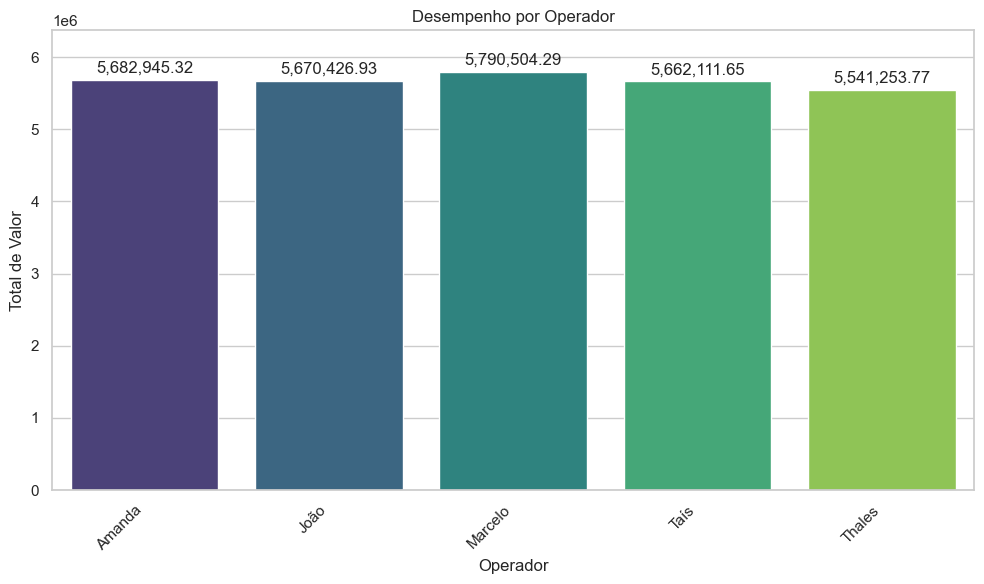

In [9]:
# Calcular o desempenho total por operador
desempenho_por_operador = df.groupby('operador')['valor'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Aumentar o tamanho da figura para dar mais espaço
ax = sns.barplot(x='operador', y='valor', data=desempenho_por_operador, palette='viridis')

# Adicionar título e rótulos dos eixos
plt.title('Desempenho por Operador')
plt.xlabel('Operador')
plt.ylabel('Total de Valor')
plt.xticks(rotation=45, ha='right')  # Ajustar a rotação e o alinhamento dos rótulos dos eixos X

# Ajustar o limite do eixo y para garantir que todos os rótulos sejam visíveis
max_valor = desempenho_por_operador['valor'].max()
plt.ylim(0, max_valor * 1.1)  # Define o limite superior do eixo y um pouco acima do valor máximo

# Adicionar rótulos de dados
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                xytext=(0, 3), 
                textcoords='offset points')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

### Verificação de desempenho por vendedor

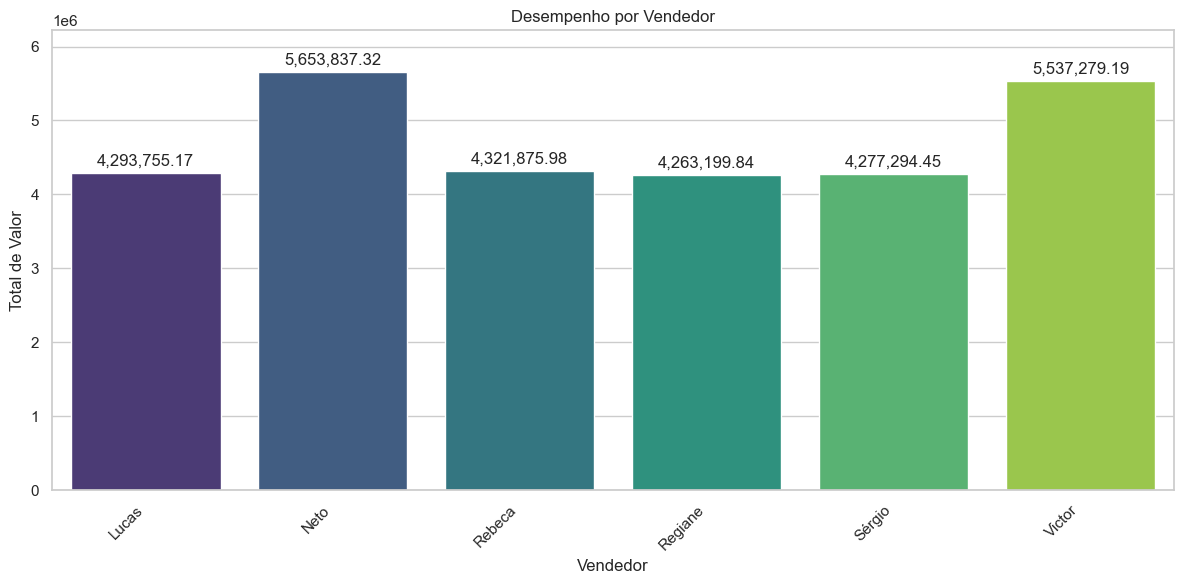

In [10]:
# Calcular o desempenho total por vendedor
desempenho_por_vendedor = df.groupby('vendedor')['valor'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar o tamanho da figura
ax = sns.barplot(x='vendedor', y='valor', data=desempenho_por_vendedor, palette='viridis')

# Adicionar título e rótulos dos eixos
plt.title('Desempenho por Vendedor')
plt.xlabel('Vendedor')
plt.ylabel('Total de Valor')
plt.xticks(rotation=45, ha='right')  # Ajustar a rotação e o alinhamento dos rótulos dos eixos X

# Ajustar o limite do eixo y para garantir que todos os rótulos sejam visíveis
max_valor = desempenho_por_vendedor['valor'].max()
plt.ylim(0, max_valor * 1.1)  # Define o limite superior do eixo y um pouco acima do valor máximo

# Adicionar rótulos de dados
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                xytext=(0, 3), 
                textcoords='offset points')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()